<a href="https://colab.research.google.com/github/Revathi-Bejawada/RevathiINFO5502_Spring2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [ ]:
### You code here:

#import all the required libraries

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

input = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/train_luc.csv")

input['datetime']=pd.to_datetime(input.datetime)

#extract hour, day, month from the datetime
input['hour'] = input['datetime'].dt.hour
input['day'] = input['datetime'].dt.day
input['month'] = input['datetime'].dt.month
input.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [ ]:
input.shape

(9174, 15)

In [ ]:
input.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753,11.537933,8.498365,6.517114
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530,6.915338,4.611702,3.447047
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000,6.000000,4.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000,12.000000,8.000000,7.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000,18.000000,13.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000,23.000000,16.000000,12.000000


In [ ]:
input.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


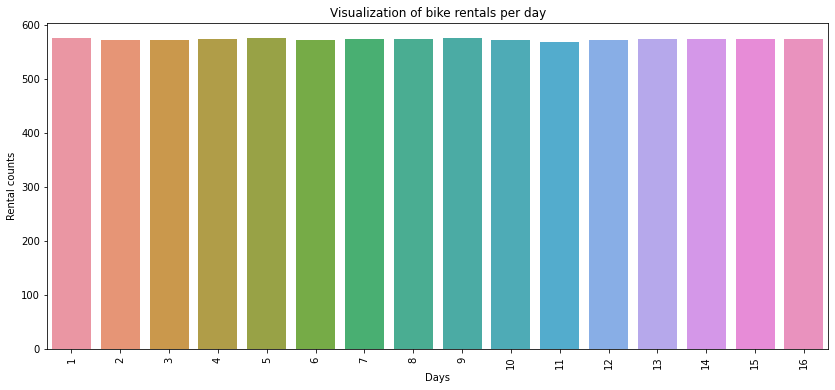

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [14, 6]
visu_ = sns.countplot(input['day'])
plt.xlabel("Days")
plt.ylabel("Rental counts")
plt.xticks(rotation=90)
plt.title("Visualization of bike rentals per day")
plt.show()

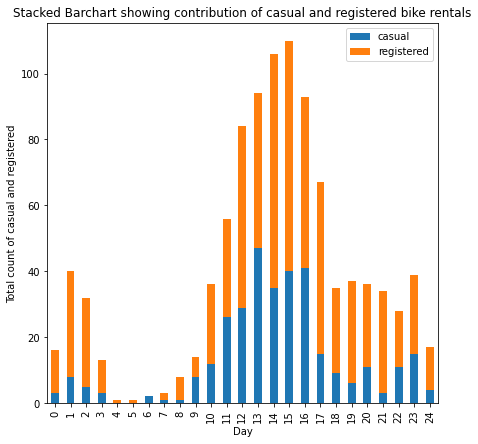

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [7, 7]
input[['casual', 'registered']][:25].plot(kind='bar', stacked=True)
plt.xlabel("Day")
plt.ylabel("Total count of casual and registered")
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


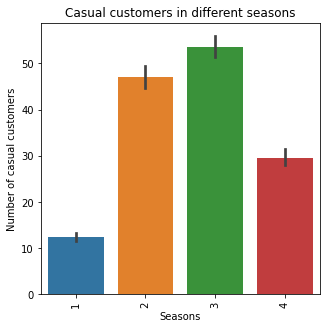

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [5, 5]
visu_ = sns.barplot('season', 'casual', data = input)
plt.xlabel("Seasons")
plt.ylabel("Number of casual customers")
plt.xticks(rotation=90)

plt.title("Casual customers in different seasons")
plt.show()

In [ ]:

for p in ['season', 'weather', 'holiday', 'workingday']:
    input[p] = input[p].astype('object')

dummy_ = pd.get_dummies(input[['season', 'holiday', 'workingday', 'weather']])

#drop not required data
R = input.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'day', 'count'], axis=1)

# join dummy data to input
R = R.join(dummy_)
s = input['count']


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# We split the dataset using Kfold cross validation
cross_val = KFold(n_splits=7, shuffle=True, random_state=None)
for train, test in cross_val.split(input):
    print('train: %s, test: %s' % (train, test))

train: [   0    1    2 ... 9170 9172 9173], test: [   9   12   19 ... 9160 9168 9171]
train: [   1    2    3 ... 9171 9172 9173], test: [   0   14   16 ... 9131 9141 9165]
train: [   0    1    2 ... 9171 9172 9173], test: [   4    7   10 ... 9156 9161 9163]
train: [   0    1    2 ... 9171 9172 9173], test: [  15   25   47 ... 9164 9166 9169]
train: [   0    1    2 ... 9170 9171 9173], test: [   8   13   17 ... 9157 9158 9172]
train: [   0    1    3 ... 9171 9172 9173], test: [   2   11   22 ... 9137 9140 9167]
train: [   0    2    4 ... 9169 9171 9172], test: [   1    3    5 ... 9162 9170 9173]


In [ ]:

input_1 = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")

input_1['datetime'] = pd.to_datetime(input_1.datetime)

input_1['hour'] = input_1['datetime'].dt.hour
input_1['month'] = input_1['datetime'].dt.month

for i in ['season', 'weather', 'holiday', 'workingday']:
    input_1[i] = input_1[i].astype('object')

dummy_1 = pd.get_dummies(input_1[['season', 'holiday', 'workingday', 'weather']])
input_1 = input_1.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)
input_1 = input_1.join(dummy_1)

input_1['weather_4'] = 0
print(input_1.columns)
print(R.columns)


Index(['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'month', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')
Index(['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'month', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')


In [ ]:
# For finding the customers count of Rentals let's use Linear Regression

from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt


lin_reg = LinearRegression()
lin_reg.fit(R.iloc[train], s.iloc[train])
lin_pre = lin_reg.predict(R.iloc[test])
sq_er = mean_squared_error(s.iloc[test], lin_pre)
print("RMSE is :", np.sqrt(sq_er))
r_score = r2_score(s.iloc[test], lin_pre)
print("R2 Score is:", r_score)

#prediction
lin_test = lin_reg.predict(input_1)
lin_test


RMSE is : 147.5098891867063
R2 Score is: 0.3421492965516719


array([ 12.01879987,  24.51477358,  24.63819512, ..., 255.29897812,
       267.32547992, 258.87359941])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# To find the count values let's use Decision Tree Regressor model 
reg = DecisionTreeRegressor(random_state=211)
reg.fit(R.iloc[train], s.iloc[train])
reg_pre = reg.predict(R.iloc[test])
sq_er = mean_squared_error(s.iloc[test], reg_pre)
print("RMSE is:", np.sqrt(sq_er))
r_score = r2_score(s.iloc[test], reg_pre)
print("R2 Score is:", r_score)
lin_test = reg.predict(input_1)
lin_test


RMSE is: 89.04486925397788
R2 Score is: 0.7602807716504566


array([ 25.,  42.,  43., ..., 207.,  64.,  93.])

In [ ]:
# To find the count values let's use Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(random_state = 211)
for_reg.fit(R.iloc[train], s.iloc[train])
for_pre = for_reg.predict(R.iloc[test])
sq_er = mean_squared_error(s.iloc[test], for_pre)
print("RMSE is:", np.sqrt(sq_er))
r_score = r2_score(s.iloc[test], for_pre)
print("R2 Score is: ", r_score)
for_test = for_reg.predict(input_1)
for_test


RMSE is: 67.68740837985727
R2 Score is:  0.861483712808641


array([ 39.91,  32.44,  34.1 , ..., 165.95, 136.64,  95.95])

In [ ]:
input_1 = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
input_1['count'] = for_test


In [ ]:
input_2 = input_1[['datetime','count']].to_csv('customers_prediction.csv', index=False, header=True)

In [ ]:

#store the test prediction values of RF Regressor model as RMSE is low for RE reg and R2 score us less for RF reg
input_2 = input_1[['datetime','count']].to_csv('BR_prediction.csv', index=False, header=True)


In [ ]:
R = input.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'day', 'count'], axis=1)
R = R.join(dummy_)
s = input['casual']
input_1 = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")

input_1['datetime'] = pd.to_datetime(input_1.datetime)

input_1['hour'] = input_1['datetime'].dt.hour
input_1['month'] = input_1['datetime'].dt.month

for p in ['season', 'weather', 'holiday', 'workingday']:
    input_1[p] = input_1[p].astype('object')

dummy_1 = pd.get_dummies(input_1[['season', 'holiday', 'workingday', 'weather']])
input_1 = input_1.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)
input_1 = input_1.join(dummy_1)
input_1['weather_4'] = 0


In [ ]:
#For predicting Casual customers using LR

lin_reg = LinearRegression()
lin_reg.fit(R.iloc[train], s.iloc[train])
lin_pre = lin_reg.predict(R.iloc[test])
sq_er = mean_squared_error(s.iloc[test], lin_pre)
print("RMSE is:", np.sqrt(sq_er))
r_score = r2_score(s.iloc[test], lin_pre)
print("R2 Score is:", r_score)

lin_test = lin_reg.predict(input_1)
lin_test


RMSE is: 33.62435017704042
R2 Score is: 0.5009456271068116


array([13.63502027, 16.84718074, 15.0466357 , ..., 18.8956109 ,
       22.81570912, 18.02362225])

In [ ]:
#For predicting Casual customers using DTR

from sklearn.tree import DecisionTreeRegressor


reg = DecisionTreeRegressor(random_state=211)
reg.fit(R.iloc[train], s.iloc[train])
reg_pre = reg.predict(R.iloc[test])
sq_er = mean_squared_error(s.iloc[test], reg_pre)
print("RMSE:", np.sqrt(sq_er))
r_squared = r2_score(s.iloc[test], reg_pre)
print("R2 Score:", r_squared)
reg_test = reg.predict(input_1)
reg_test


RMSE: 22.36323574479103
R2 Score: 0.7792456096803808


array([5., 5., 2., ..., 9., 5., 3.])

In [ ]:
#For predicting Casual customers using RFR

from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(random_state = 211)
for_reg.fit(R.iloc[train], s.iloc[train])
for_pre = for_reg.predict(R.iloc[test])
sq_er = mean_squared_error(s.iloc[test], for_pre)
print("RMSE:", np.sqrt(sq_er))
r_squared = r2_score(s.iloc[test], for_pre)
print("R2 Score:", r_squared)
for_test = for_reg.predict(input_1)
for_test


RMSE: 17.01591994442361
R2 Score: 0.8721940912065698


array([ 3.03,  2.78,  4.43, ..., 10.65,  9.57,  5.93])

In [ ]:


#store the test prediction values of RF Regressor model as RMSE is low for RE reg and R2 score us less for RF reg

input_1 = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
input_1['count'] = for_test
input_2 = input_1[['datetime','count']].to_csv('casual_customers_prediction.csv', index=False, header=True)


In [ ]:
#Registered Customers prediction


R = input.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'day', 'count'], axis=1)
R = R.join(dummy_)
s = input['registered']
input_1 = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")

input_1['datetime'] = pd.to_datetime(input_1.datetime)

input_1['hour'] = input_1['datetime'].dt.hour
input_1['month'] = input_1['datetime'].dt.month

for p in ['season', 'weather', 'holiday', 'workingday']:
    input_1[p] = input_1[p].astype('object')

dummy_1 = pd.get_dummies(input_1[['season', 'holiday', 'workingday', 'weather']])
input_1 = input_1.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)
input_1 = input_1.join(dummy_1)
input_1['weather_4'] = 0


In [ ]:

#For predicting Registered Customers count using LR

lin_reg = LinearRegression()
lin_reg.fit(R.iloc[train], s.iloc[train])
lin_pre = lin_reg.predict(R.iloc[test])
sq_er = mean_squared_error(s.iloc[test], lin_pre)
print("RMSE is:", np.sqrt(sq_er))
r_score = r2_score(s.iloc[test], lin_pre)
print("R2 Score is:", r_score)
lin_test = lin_reg.predict(input_1)
lin_test


RMSE is: 130.241088371763
R2 Score is: 0.2712873325631501


array([ -1.6162204 ,   7.66759284,   9.59155942, ..., 236.40336721,
       244.5097708 , 240.84997716])

In [ ]:

#For predicting Registered Customers count using DTR


from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=211)
reg.fit(R.iloc[train], s.iloc[train])
reg_pre = reg.predict(R.iloc[test])
sq_er = mean_squared_error(s.iloc[test], reg_pre)
print("RMSE:", np.sqrt(sq_er))
r_score = r2_score(s.iloc[test], reg_pre)
print("R2 Score:", r2_score)
reg_test = reg.predict(input_1)
reg_test


RMSE: 74.87328353816373
R2 Score: <function r2_score at 0x7f5be3939170>


array([ 24.,  14.,  14., ..., 193.,  99.,  53.])

In [ ]:

#For predicting Registered Customers count using RFR


from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(random_state = 211)
for_reg.fit(R.iloc[train], s.iloc[train])
for_pre = for_reg.predict(R.iloc[test])
sq_er = mean_squared_error(s.iloc[test], for_pre)
print("RMSE:", np.sqrt(sq_er))
r_score = r2_score(s.iloc[test], for_pre)
print("R2 Score:",r_score)
for_test = for_reg.predict(input_1)
for_test


RMSE: 59.994156140903314
R2 Score: 0.8453755443853218


array([ 35.39,  31.43,  26.75, ..., 154.93, 124.47,  78.33])

In [ ]:

#store the test prediction values of RF Regressor model as RMSE is low for RE reg and R2 score us less for RF reg


input_2 = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv', header=0)
print("\nNumber of samples:",input_2.shape[0] ,"and number of features:",input_2.shape[1],"\n")

input_1 = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
input_1['count'] = for_test
input_2 = input_1[['datetime','count']].to_csv('final_register_customers_prediction.csv', index=False, header=True)
print("Prediction completed and it is Saved as final_register_customers_prediction.csv")



Number of samples: 1712 and number of features: 9 

Prediction completed and it is Saved as final_register_customers_prediction.csv
